CUSTOMER CHURN PROJECT -
In the telecom industry, customers churning to competitors is big issue. This project analyzes the company data and finds insights about why customers might be churning out, and establish steps to prevent it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
customer_churn = pd.read_csv('/kaggle/input/cutomer-churn/customer_churn.csv')

Data Manipulation

In [3]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_churn.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# DATA MANIPULATION
# Extracting 5th column from the entire dataset

customer_5 = customer_churn.iloc[:,4]
customer_5.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [6]:
# Extracting the 15th column

customer_15 = customer_churn.iloc[:,14]
customer_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [7]:
# Extracting all the male senior citizens who pay via Electronic check

senior_male_electronic = customer_churn[(customer_churn['gender'] == 'Male') & (customer_churn['SeniorCitizen'] == 1) & (customer_churn['PaymentMethod'] == 'Electronic check')]
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [8]:
# Exctracting all the customers whose tenure is greater than 70 months or their monthly charges are over $100

customer_total_tenure = customer_churn[(customer_churn['tenure'] > 70) | (customer_churn['MonthlyCharges'] > 100)]
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [9]:
# Extracting customers whose contract is of two years, payment method is mailed check, and the value of Churn is yes

two_mail_yes = customer_churn[(customer_churn['Contract'] == "Two year") & (customer_churn['PaymentMethod'] == "Mailed check") & (customer_churn['Churn'] == 'Yes')]
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [10]:
# Extracting 333 customers at random

customer_333 = customer_churn.sample(n = 333, random_state = 42)
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No


In [11]:
# Getting the count of different levels from Churn column

customer_churn['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Data Visualization

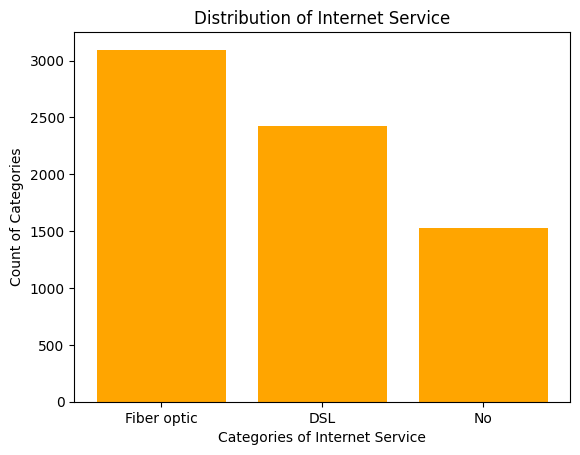

In [12]:
# Bar-plot to visualize the distribution of internet services

plt.bar(customer_churn['InternetService'].value_counts().keys().tolist(), customer_churn['InternetService'].value_counts().tolist(), color = 'orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

Inference (Distribution of Service): Out of the cutomers who do have internet service, majority have opted for Fiber Optic.

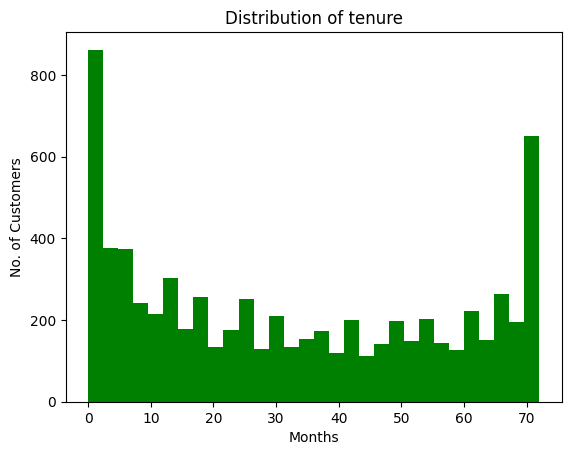

In [13]:
# Histogram to visualize the tenure distribution

plt.hist(customer_churn['tenure'], bins=30, color = 'green')
plt.xlabel('Months')
plt.ylabel('No. of Customers')
plt.title('Distribution of tenure')
plt.show()

Inference (Distribution of tenure): Customers tend to leave the service between 10 to 65 months

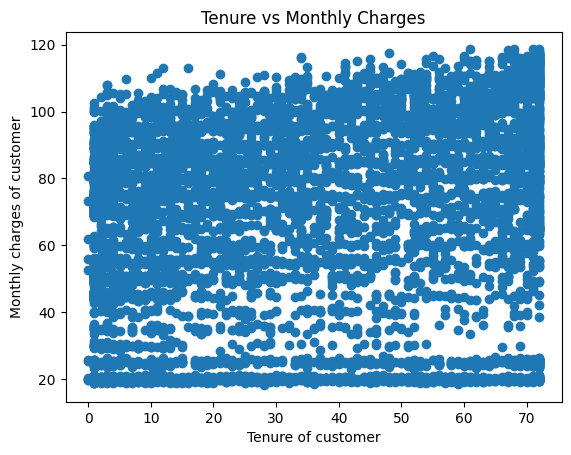

In [14]:
# Scatter plot to visualize how monthly charges change with tenure

plt.scatter(customer_churn['tenure'], customer_churn['MonthlyCharges'])
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

Inference (Tenure vs monthly charges): There are less customers whose monthly bills are around $35, most around $20 and $100.

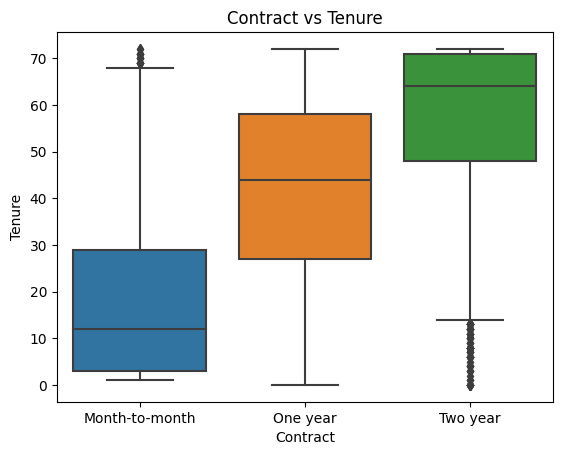

In [15]:
# Box plot to visualize the effect of contract on tenure

sns.boxplot(x = customer_churn['Contract'], y = customer_churn['tenure'])
plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.title('Contract vs Tenure')
plt.show()

Inference (Contract vs tenure): Customers with two year contracts tend to last longer with the service

LINEAR REGRESSION (Tenure(independent), Monthly Charges(dependent))

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
# Defining the dependent and independent variable
X = np.array(customer_churn['tenure'])
X_r = X.reshape(-1,1) # Reshaping the array
y = customer_churn['MonthlyCharges']

# Splitting the data into training and testing set in the ratio 70:30
X_rtrain, X_rtest, y_train, y_test = train_test_split(X_r, y, test_size = 0.3, random_state = 42)

# Building and training the linear regression model on the training set
linear_train = LinearRegression()
linear_train.fit(X_rtrain, y_train)

LinearRegression()

In [18]:
# Making prediction on the test set
y_pred = linear_train.predict(X_rtest)

# Finding the root mean squared error
error = np.sqrt(mean_squared_error(y_test,y_pred))

print("The root mean squared error is: ",error)

The root mean squared error is:  29.07936015646814


LOGISTIC REGRESSION (Monthly Charges(independent), Churn(dependent))

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
# Defining the dependent and independent variable
X = np.array(customer_churn['MonthlyCharges'])
X_r = X.reshape(-1,1) # Reshaping the array
y = customer_churn['Churn']

# Dividing into train and test data with the ratio 65:35
X_rtrain, X_rtest, y_train, y_test = train_test_split(X_r, y, test_size = 0.35, random_state=42)

log_train = LogisticRegression()
log_train.fit(X_rtrain, y_train)

LogisticRegression()

In [21]:
# Predicting on test data
y_pred = log_train.predict(X_rtest)

# Building the confusion matrix and getting the accuracy score
conf_matrix = confusion_matrix(y_test,y_pred)
acc_score = accuracy_score(y_test, y_pred)

print("Confusion matrix = \n", conf_matrix)
print("Accuracy Score = ", acc_score)

Confusion matrix = 
 [[1797    0]
 [ 669    0]]
Accuracy Score =  0.7287104622871047


LOGISTIC REGRESSION ( Independent - Tenure, Monthly Charges) & (Dependent - Churn)

In [22]:
# Defining independent and depedent variables
X = customer_churn[['tenure','MonthlyCharges']]
y = customer_churn['Churn']

# Dividing into train and test data with the ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Making a multiple logistic regression model
multi_log = LogisticRegression()
multi_log.fit(X_train, y_train)

LogisticRegression()

In [23]:
# Predicting on test data
y_pred = multi_log.predict(X_test)

multi_cm = confusion_matrix(y_test, y_pred)
multi_acc  = accuracy_score(y_test,y_pred)

print("Confusion Matrix (Multiple Logistic Regression): \n", multi_cm)
print("Accuracy Score (Multiple Logistic Regression): ",multi_acc)

Confusion Matrix (Multiple Logistic Regression): 
 [[944  92]
 [193 180]]
Accuracy Score (Multiple Logistic Regression):  0.7977288857345636


DECISION TREE CLASSIFIER (Independent - Tenure) & (Dependent - Churn)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
# Defining independent and depedent variables
X = np.array(customer_churn['tenure'])
X_r = X.reshape(-1,1) # Reshaping the array
y = customer_churn['Churn']

# Splitting into train and test data with the ratio 80:20
X_rtrain, X_rtest, y_train, y_test = train_test_split(X_r, y, test_size = 0.2, random_state = 42)

# Building the Decision Tree Classifier model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_rtrain, y_train)

DecisionTreeClassifier()

In [26]:
# Predicting test data
y_pred = dt_model.predict(X_rtest)

# Calculating confusion matrix and model accuracy score
dt_cm = confusion_matrix(y_test, y_pred)
dt_acc = accuracy_score(y_test, y_pred)
print("Confusion matrix (Decision Tree Classifier): \n", dt_cm)
print("Accuracy Score (Decision Tree Classifier): ", dt_acc)

Confusion matrix (Decision Tree Classifier): 
 [[951  85]
 [257 116]]
Accuracy Score (Decision Tree Classifier):  0.7572746628814763


Random Forest Classifier (Independent - Tenure, Monthly Charges) & (Dependent - Churn)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Defining independent and dependent variables
X = customer_churn[['tenure','MonthlyCharges']]
y = customer_churn['Churn']

# Splitting into train and test data with the ratio 70:30
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Building the Random Forest Classifier Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
# Predicting test data
y_pred = rf_model.predict(X_test)

rf_cm = confusion_matrix(y_test, y_pred)
rf_acc = accuracy_score(y_test, y_pred)
print("Confusion matrix (Random Forest Classifier): \n",rf_cm)
print("Accuracy Score (Random Forest Classifier): ",rf_acc)

Confusion matrix (Random Forest Classifier): 
 [[1327  212]
 [ 311  263]]
Accuracy Score (Random Forest Classifier):  0.7524846190250828


Multiple Logistic Regression model provided the best accuracy for this problem. Steps can be taken to better the marketing for the two year plan (For ex: better offers on contract phones for two years) to avoid customer churn out.